In [1]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from collections import Counter
import random
import matplotlib.pyplot as plt

def helper(counter_object):
  temp = {}
  for k,v in counter_object.items():
    temp[k] = v
  return temp

feature_data = np.load('../tfidf_features.npz')

tfidf_vectors = feature_data['name1']
# user_labels = feature_data['name2']


In [50]:
n_clusters = 10
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
kmeans.fit(tfidf_vectors)

#labels assigned to each tweet
clusters = kmeans.labels_
print("len = ", len(clusters))
counts = Counter(clusters)
print(counts)

df = pd.read_csv('../cleaned_tweets.csv', index_col=[0])
print("df len", len(df))
df.columns = ['tweet', 'user']

all_tweets_list = df['tweet']
user_labels = df['user']

cluster_tweets = []
cluster_users = []

for i in range(n_clusters):
    cluster_tweets.append([])
    cluster_users.append([])

for i in range(len(all_tweets_list)):
    cluster_label = clusters[i]
    cluster_tweets[cluster_label].append(all_tweets_list[i])
    cluster_users[cluster_label].append(user_labels[i])




len =  38230
Counter({0: 25931, 5: 3237, 1: 1941, 3: 1824, 6: 1658, 4: 1567, 2: 688, 9: 541, 8: 457, 7: 386})
df len 38230


In [51]:
histo_list = []
for i in range(len(cluster_tweets)):
    print("CLUSTER ", i)
    print("=========\n")
    ct = cluster_tweets[i].copy()
    random.shuffle(ct)
    for j in range(20):
        print(ct[j])
    
    x = Counter(cluster_users[i])
    histo_list.append(helper(x))
    print(x)

CLUSTER  0

guess seen
minute watch dota 2 ai play live main stage international
ready
possible detect earthquake submarine cable think might
glad see american factory oscar nod best documentary kind story see often enough exactly michelle hope achieve higher ground congrats incredible filmmaker entire team
win speed finesse win grit sheer force versatility warriors team impressive
always amazed disconnect see news reality world around u late friend hans rosling would say must fight fear instinct distorts perspective
happy see adopt #tensorflow help accelerate progress machine learning everyone
looking good book read summer favorite
congrats running youtube salar kamangar amazing success youtube leadership
certainly hope
biden-harris administration congress must continue championing bold meaningful investment nation's care infrastructure — sean mcgarvey #carecantwait
human right must center foreign policy periphery way endless military deployment
2 cracking goal amex ... side note thou

In [52]:
# y = list(histo_list[0].values())
# x = list(histo_list[0].keys())
# faulty_index = -1
# for i in range(len(x)):
#     if (str(type(x[i])) == "<class 'float'>"):
#         faulty_index = i

# if (faulty_index != -1):
#     del x[faulty_index]
#     del y[faulty_index]

# plt.xticks(rotation=80)
# clustername = 'Cluster ' + str(0)
# plt.title(clustername)
# plt.bar(x, y, color='b')
# plt.savefig('visualize.jpeg')

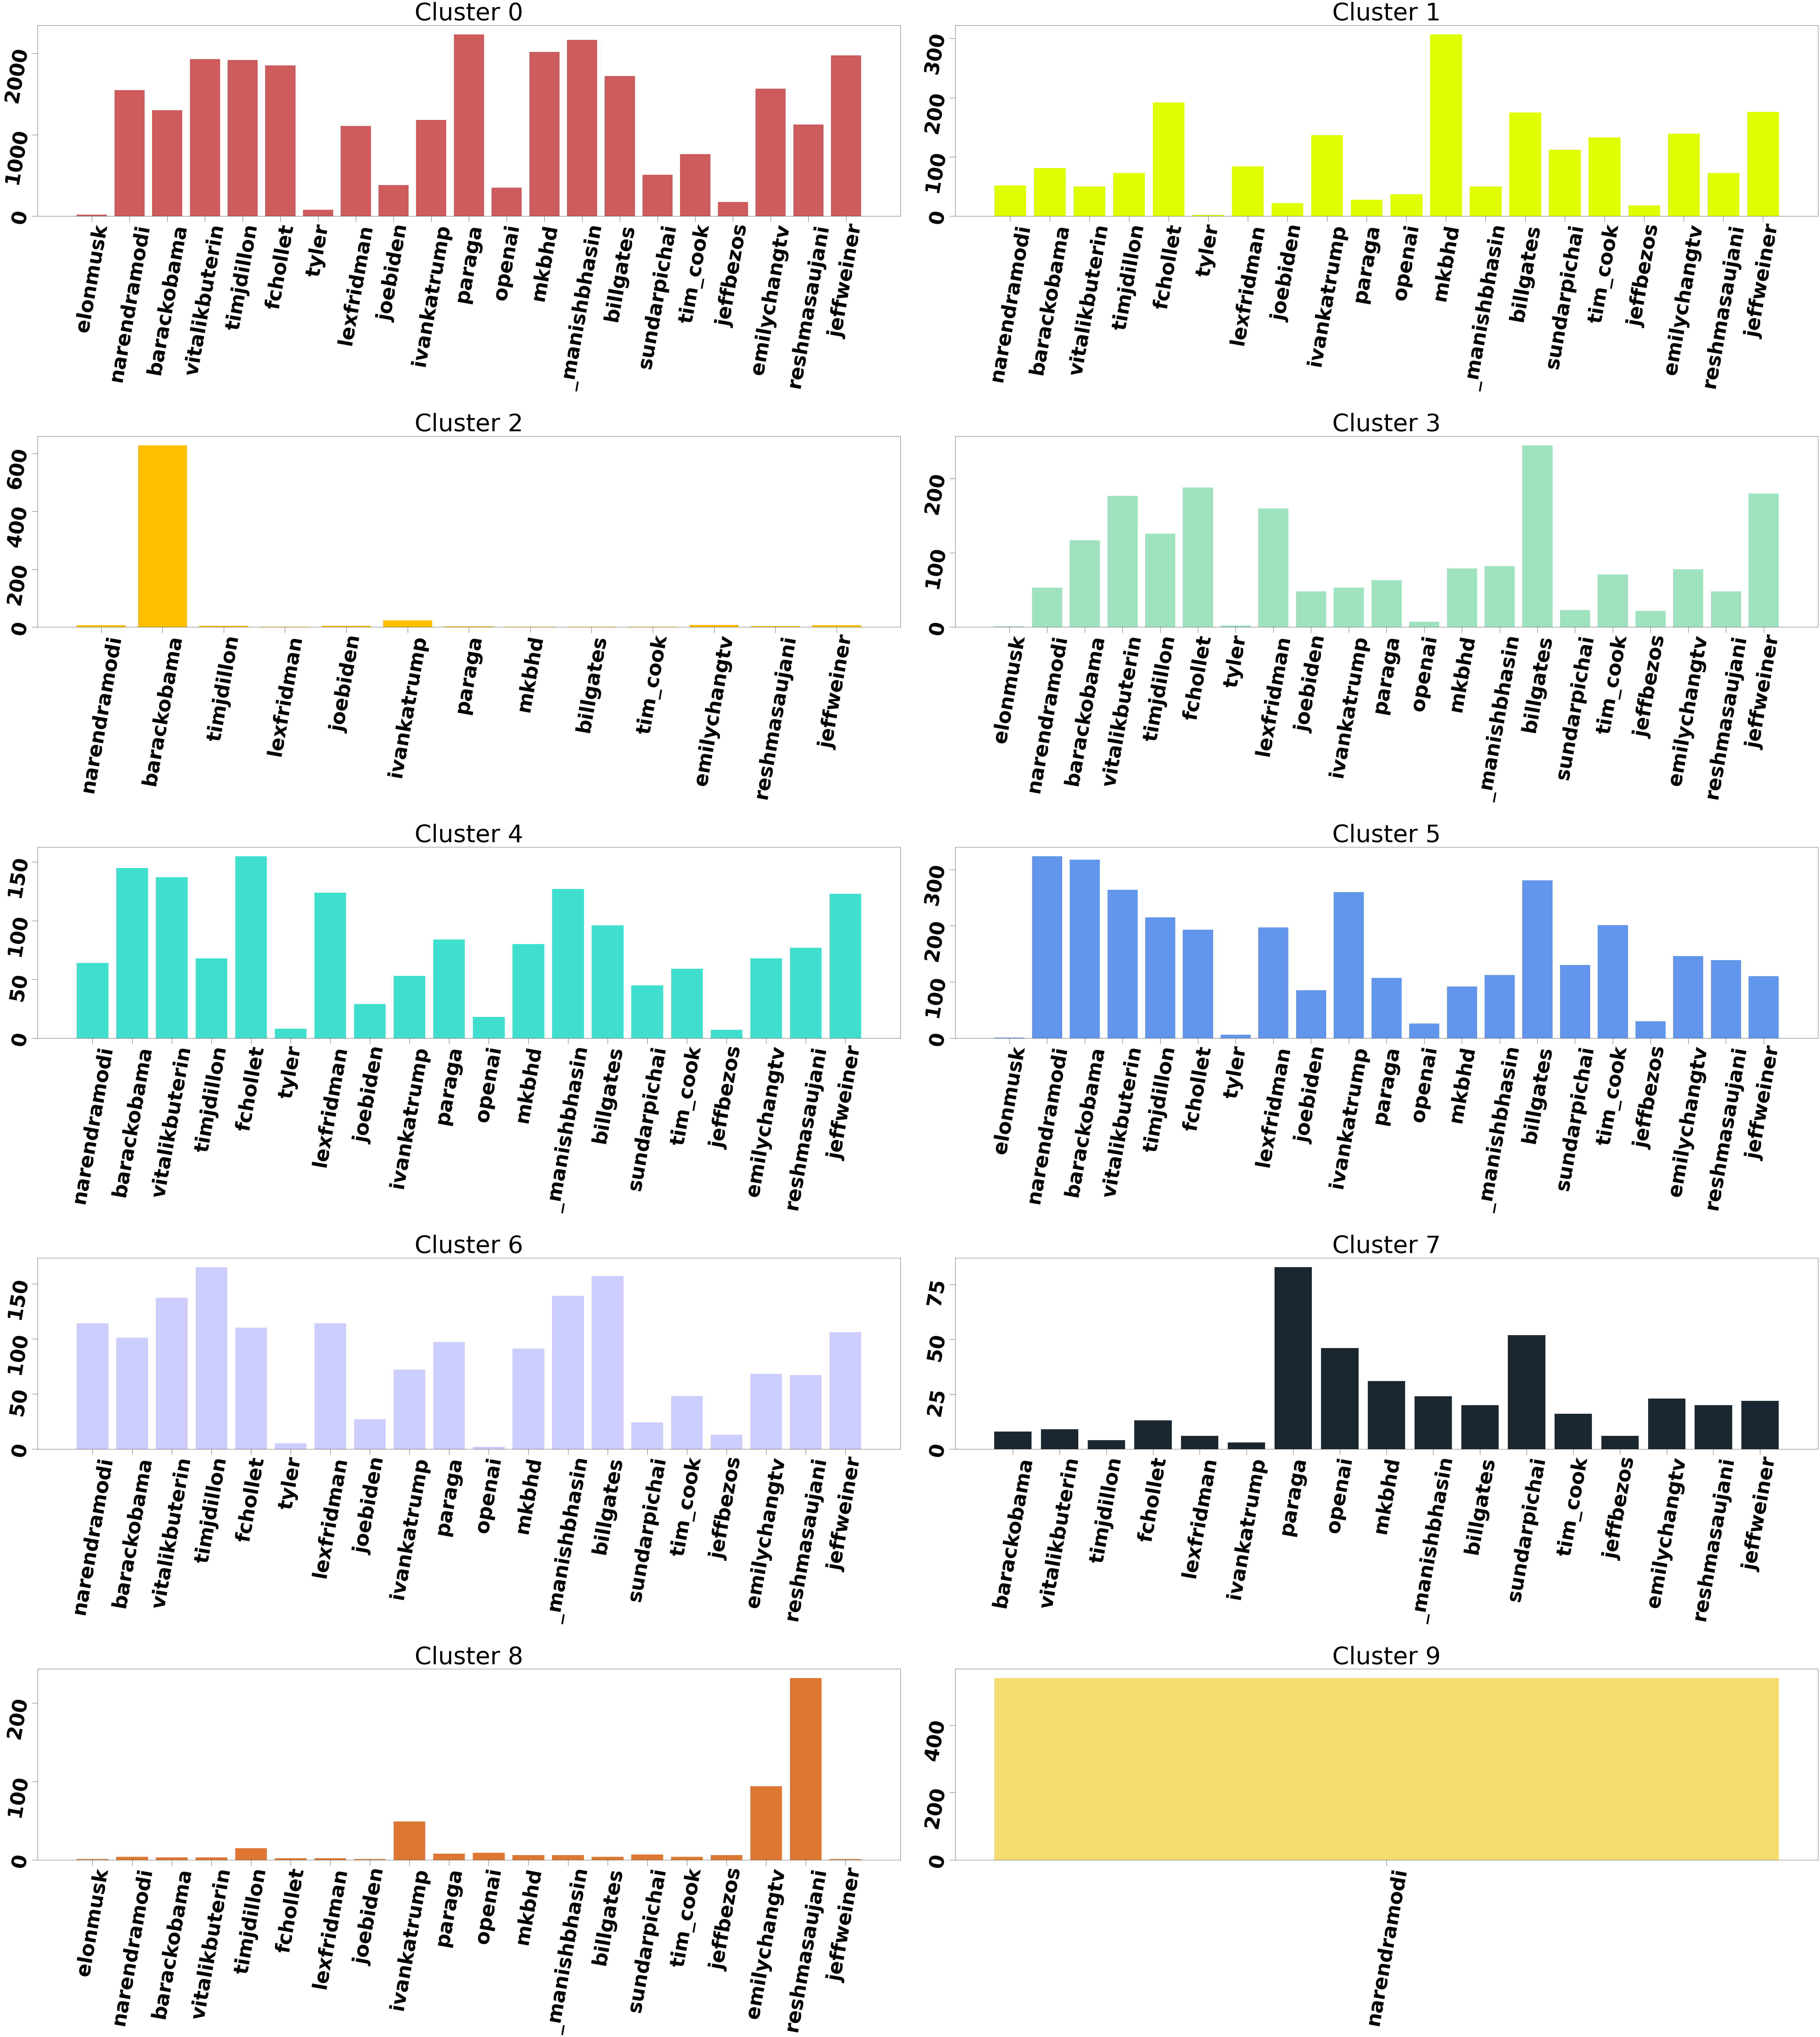

<Figure size 1440x2880 with 0 Axes>

In [101]:
rows = 5
cols = 2
# plt.title("K Means Clusters Visualization of Twitter Users' Tweets")
fig, axes = plt.subplots(nrows=rows, ncols=cols)
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 70}


import matplotlib as mpl
mpl.rc('font', **font)
fig.set_size_inches(90, 100.5)
#width,height


colors = ['#CD5C5C', '#DFFF00', '#FFBF00', '#9FE2BF', '#40E0D0', '#6495ED','#CCCCFF', '#1B2631',  '#DC7633',  '#F7DC6F']
cluster_id = 0
for row in range(rows):
    for col in range(cols):
        y = list(histo_list[cluster_id].values())
        x = list(histo_list[cluster_id].keys())
        faulty_index = -1
        for i in range(len(x)):
            if (str(type(x[i])) == "<class 'float'>"):
                faulty_index = i

        if (faulty_index != -1):
            del x[faulty_index]
            del y[faulty_index]

        
        clustername = 'Cluster ' + str(cluster_id)
        axes[row,col].title.set_text(clustername)
        axes[row,col].bar(x, y, color=colors[cluster_id])
        axes[row,col].tick_params(rotation=80, size=20)
        cluster_id += 1
    

plt.tight_layout()
plt.show()
plt.savefig('visualize.png')
